# Convolutional Neural Network
If you're familiar with feedforward neural networks, you already understand that they consist of layers of neurons that process input data through weights and activation functions. However, when dealing with image data, traditional feedforward networks have limitations. This is where Convolutional Neural Networks (CNNs) come in.

### Why CNNs

Imagine trying to process a 224x224 RGB image with a feedforward network:

Input size: 224 × 224 × 3 = 150,528 input neurons
- For just one hidden layer with 1000 neurons, you'd need 150,528,000 weights!
- The network doesn't maintain spatial relationships between pixels
- No built-in way to handle translation invariance (recognizing objects regardless of position)

### Core Concepts of CNNs

Instead of connecting every input to every neuron, CNNs use filters (or kernels) that slide over the input:

![CNN Filter](https://miro.medium.com/v2/resize:fit:720/format:webp/1*z3tVpwY2ULg3UlwXwAGQwg.png)


The filter slides across the image, performing element-wise multiplication and summing the results. This creates a feature map that highlights specific patterns.

### Key Properties of CNN

Spatial Hierarchy

- **Early layers**: Detect simple features (edges, corners).

- **Middle layers**: Combine features into patterns (textures, shapes).

- **Deep layers**: Recognize complex objects (faces, cars).

Parameter Sharing

- Same filter applied across the image reduces parameters.

- Enables feature detection regardless of position.

Translation Invariance

- Recognizes features anywhere in the image.



## Understanding each layer

1. Convolutional Layer
This is the core building block of a CNN. Think of it as a flashlight sliding over an image

In [1]:
import torch.nn as nn

# Example of a convolutional layer
conv_layer = nn.Conv2d( # For 2D Input data
    in_channels=3,    # RGB input
    out_channels=64,  # Number of filters
    kernel_size=3,    # 3x3 filter
    stride=1,         # Move 1 pixel at a time
    padding=1         # Keep spatial dimensions
)

How it works:

- The filter (kernel) slides over the input image
- At each position, it performs element-wise multiplication and sums the results
- Smaller kernels (3×3 or 5×5) are commonly used to detect features like edges, textures
- Multiple filters learn different features in parallel

2. Activation Layer (ReLU)
Just like in regular neural networks, we need non-linearity:

In [2]:
activation = nn.ReLU()
# Applies max(0,x) to all elements

3. Pooling Layer
Reduces spatial dimensions while keeping important information:

In [3]:
pool_layer = nn.MaxPool2d(
    kernel_size=2,  # 2x2 window
    stride=2        # Move 2 pixels at a time
)

Input Feature Map:

\begin{bmatrix} 
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16
\end{bmatrix}

Look at each 2×2 block, and pick the biggest number:
\begin{bmatrix}
6 & 8 \\
14 & 16
\end{bmatrix}

#### Why Use Pooling?

Shrinks the Feature Map:
- Reduces the size, making the model faster and less memory-hungry.

Keeps the Most Important Info:
- Keeps only the strongest signals (like edges or patterns).

4. Fully Connected Layer
Converts spatial features into a flat vector for final classification:

In [4]:
fc_layer = nn.Linear(
    in_features=64 * 7 * 7,  # Flattened input size
    out_features=10          # Number of classes
)

### Putting it all together

In [8]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # First Convolutional Block
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        
        # Second Convolutional Block
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        
        # Third Convolutional Block
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # First block
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        # Second block
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        # Third block
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        # Flatten and pass through FC layers
        x = x.view(-1, 128 * 4 * 4)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

![cnn](assets/cnn.png)

### CIFAR Dataset

The CIFAR-10 dataset is a popular dataset used in machine learning and computer vision research. It consists of:

10 Classes: Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
Images:
60,000 color images, each of size 32x32 pixels.
50,000 images for training and 10,000 for testing.


In [ ]:
!pip install torchvision

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Define transformations with resizing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
classes = trainset.classes  # List of class names

# Display images from 10th to 15th
plt.figure(figsize=(12, 8))
for idx, i in enumerate(range(10, 16)):
    image, label = trainset[i]
    image = image / 2 + 0.5  # Unnormalize
    plt.subplot(2, 3, idx + 1)
    plt.imshow(image.permute(1, 2, 0))  # Rearrange to HxWxC
    plt.title(classes[label])
    plt.axis('off')
plt.tight_layout()
plt.show()


Lets first check the initial accuracy of the model


In [3]:
import torch


def evaluate_model(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation for evaluation
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified


In [9]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")
model = SimpleCNN().to(device)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)
initial_accuracy = evaluate_model(model, testloader, device)
print(f"Initial Test Accuracy: {initial_accuracy:.2f}%")

Using device: mps
Files already downloaded and verified
Initial Test Accuracy: 10.15%


In [10]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim

# Check for GPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


# Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

# # Define a simple CNN
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(64 * 8 * 8, 128)
#         self.fc2 = nn.Linear(128, 10)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 8 * 8)
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # Initialize model, loss, and optimizer
# model = SimpleCNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

Using device: mps
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 1.901
[Epoch 1, Batch 200] loss: 1.552
[Epoch 1, Batch 300] loss: 1.499
[Epoch 1, Batch 400] loss: 1.367
[Epoch 1, Batch 500] loss: 1.364
[Epoch 1, Batch 600] loss: 1.271
[Epoch 1, Batch 700] loss: 1.217
[Epoch 1, Batch 800] loss: 1.170
[Epoch 1, Batch 900] loss: 1.157
[Epoch 1, Batch 1000] loss: 1.145
[Epoch 1, Batch 1100] loss: 1.064
[Epoch 1, Batch 1200] loss: 1.081
[Epoch 1, Batch 1300] loss: 1.010
[Epoch 1, Batch 1400] loss: 0.996
[Epoch 1, Batch 1500] loss: 1.019
[Epoch 2, Batch 100] loss: 0.921
[Epoch 2, Batch 200] loss: 0.911
[Epoch 2, Batch 300] loss: 0.931
[Epoch 2, Batch 400] loss: 0.907
[Epoch 2, Batch 500] loss: 0.873
[Epoch 2, Batch 600] loss: 0.890
[Epoch 2, Batch 700] loss: 0.868
[Epoch 2, Batch 800] loss: 0.863
[Epoch 2, Batch 900] loss: 0.820
[Epoch 2, Batch 1000] loss: 0.836
[Epoch 2, Batch 1100] loss: 0.845
[Epoch 2, Batch 1200] loss: 0.819
[Epoch 2, Batch 1300] loss: 0.852
[Epoch 2, 

In [10]:
final_accuracy = evaluate_model(model, testloader, device)
print(f"Final Test Accuracy: {final_accuracy:.2f}%")

Final Test Accuracy: 71.90%


## Using Vision tools
### OpenCV Tutorial
OpenCV (Open Source Computer Vision Library) is an open-source library that includes several hundreds of computer vision algorithms.


### Basic Image operations

In [ ]:
!pip install opencv-python numpy

In [2]:
import cv2
import numpy as np

# Read an image
img = cv2.imread("assets/sample_image.jpg") 


Basic operations

In [3]:
resized = cv2.resize(img, (300, 200))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Rotate image
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
rotated = cv2.warpAffine(img, M, (cols, rows))

# Crop image
cropped = img[100:300, 200:400]

In [5]:
cv2.imshow("Grayscale Image", gray)
cv2.waitKey(1)  # Wait for a key press
cv2.destroyWindow("Grayscale Image")  # Close the grayscale window

2025-01-19 14:51:32.862 python[17906:21914161] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-19 14:51:32.862 python[17906:21914161] +[IMKInputSession subclass]: chose IMKInputSession_Modern


OPENCV is widely used in document scanning and OCR. Here's an example using OPENCV to scan a Govt of Karnataka scanned notification

In [2]:
!pip install opencv-python numpy pytesseract pillow matplotlib

  Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
You should consider upgrading via the '/Users/adityaganguli/.pyenv/versions/3.8.16/envs/tech-env/bin/python -m pip install --upgrade pip' command.



Processing document: assets/scan.png
Attempting to read image from: assets/scan.png
File exists: True
Successfully read image with OpenCV
Image shape: (1522, 1488, 3)

Preprocessing image...

Detecting text regions...
Found 1 contours
Identified 1 text regions

Extracting text...
Processing region 1/1
Found text in region 1


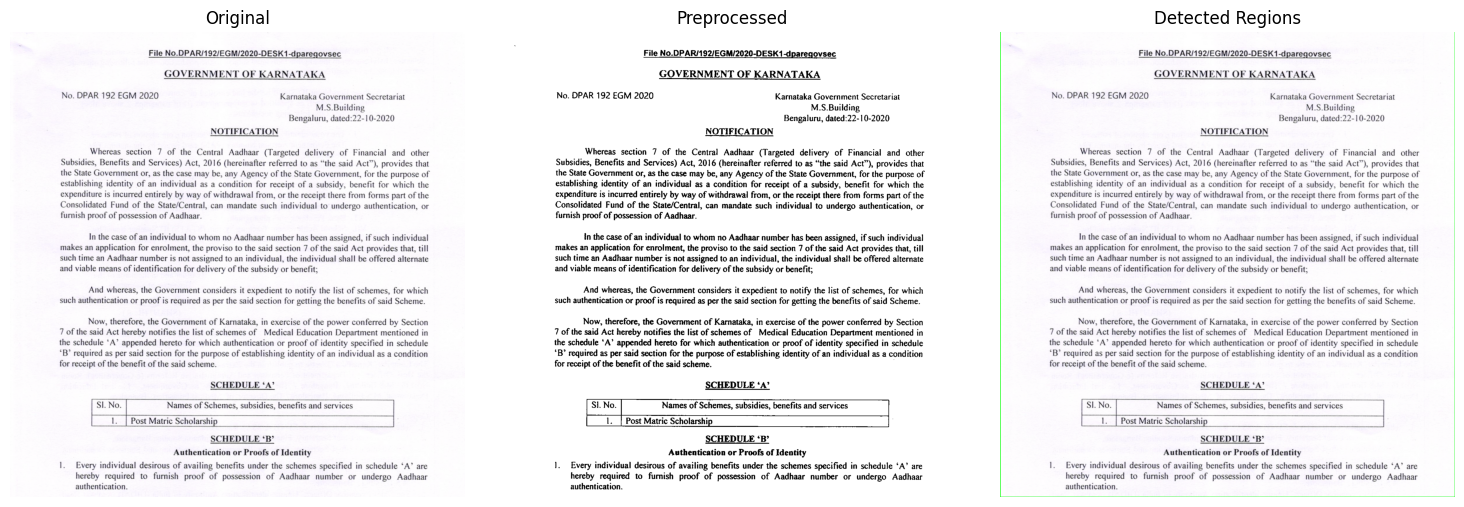


Extracted Text:

Region 1:
--------------------------------------------------
, Fite No.DPAR/192/EGM/2020-DESK1-dpareqovsec
GOVERNMENT OF KARNATAKA
No. DPAR 192 EGM 2020 Karnataka Government Secretariat
M.S. Building
Bengaluru, dated:22-10-2020
NOTIFICATION
Whereas section 7 of the Central Aadhaar (Targeted delivery of Financial and other
Subsidies, Benefits and Services) Act, 2016 (hereinafter referred to as “the said Act”), provides that
the State Government or, as the case may be, any Agency of the State Government, for the purpose of
establishing identity of an individual as a condition for receipt of a subsidy, benefit for which the
expenditure is incurred entirely by way of withdrawal from, or the receipt there from forms part of the
Consolidated Fund of the State/Central, can mandate such individual to undergo authentication, or
furnish proof of possession of Aadhaar.
in the case of an individual to whom no Aadhaar number has been assigned, if such individual
makes an applicati

In [6]:
# Import required libraries
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import os

def read_image(file_path):
    """Read image with error handling and debug info"""
    print(f"Attempting to read image from: {file_path}")
    print(f"File exists: {os.path.exists(file_path)}")
    
    # Try reading with OpenCV
    image = cv2.imread(file_path)
    if image is None:
        print("OpenCV couldn't read the image. Trying with PIL...")
        try:
            pil_image = Image.open(file_path)
            image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
            print("Successfully read image with PIL")
        except Exception as e:
            print(f"Error reading image with PIL: {str(e)}")
            raise ValueError("Could not read the image with either OpenCV or PIL")
    else:
        print("Successfully read image with OpenCV")
        print(f"Image shape: {image.shape}")
    
    return image

class DocumentProcessor:
    def __init__(self, image_path):
        """Initialize with image path"""
        self.original_image = read_image(image_path)
        
    def preprocess_image(self):
        """Enhance image quality for better text detection"""
        # Convert to grayscale
        gray = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2GRAY)
        
        # Increase contrast using CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        contrast = clahe.apply(gray)
        
        # Apply thresholding
        _, binary = cv2.threshold(contrast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Denoise
        denoised = cv2.fastNlMeansDenoising(binary)
        
        return denoised

    def detect_text_regions(self, preprocessed_image):
        """Find regions containing text"""
        # Find contours
        contours, _ = cv2.findContours(
            preprocessed_image, 
            cv2.RETR_EXTERNAL, 
            cv2.CHAIN_APPROX_SIMPLE
        )
        print(f"Found {len(contours)} contours")
        
        # Filter and sort contours
        text_regions = []
        min_area = 100  # Minimum area for a text region
        
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            area = w * h
            aspect_ratio = w / float(h)
            
            # Filter based on area and aspect ratio
            if area > min_area and 0.1 < aspect_ratio < 20:
                text_regions.append((x, y, w, h))
        
        # Sort regions top-to-bottom
        text_regions.sort(key=lambda r: r[1])
        print(f"Identified {len(text_regions)} text regions")
        return text_regions

    def extract_text(self, preprocessed_image, regions):
        """Extract text using Tesseract OCR"""
        extracted_text = []
        
        # Configure Tesseract parameters for better accuracy
        custom_config = r'--oem 3 --psm 6'
        
        for i, (x, y, w, h) in enumerate(regions):
            print(f"Processing region {i+1}/{len(regions)}")
            # Extract region
            roi = preprocessed_image[y:y+h, x:x+w]
            
            # Convert to PIL Image
            roi_pil = Image.fromarray(roi)
            
            try:
                # Extract text
                text = pytesseract.image_to_string(roi_pil, lang='eng', config=custom_config)
                if text.strip():
                    extracted_text.append((i+1, text.strip()))
                    print(f"Found text in region {i+1}")
            except Exception as e:
                print(f"Error processing region {i+1}: {str(e)}")
        
        return extracted_text

    def visualize_regions(self, regions):
        """Draw boxes around detected text regions"""
        visualization = self.original_image.copy()
        
        for i, (x, y, w, h) in enumerate(regions):
            # Draw rectangle
            cv2.rectangle(visualization, (x, y), (x+w, y+h), (0, 255, 0), 2)
            # Add region number
            cv2.putText(visualization, str(i+1), (x, y-5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        return visualization

def process_document(file_path):
    """Process document and display results"""
    try:
        # Initialize processor
        print(f"\nProcessing document: {file_path}")
        processor = DocumentProcessor(file_path)
        
        # Preprocess image
        print("\nPreprocessing image...")
        preprocessed = processor.preprocess_image()
        
        # Detect regions
        print("\nDetecting text regions...")
        regions = processor.detect_text_regions(preprocessed)
        
        # Extract text
        print("\nExtracting text...")
        text = processor.extract_text(preprocessed, regions)
        
        # Create visualization
        visualization = processor.visualize_regions(regions)
        
        # Display results
        plt.figure(figsize=(15, 5))
        
        # Original
        plt.subplot(131)
        plt.imshow(cv2.cvtColor(processor.original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')
        
        # Preprocessed
        plt.subplot(132)
        plt.imshow(preprocessed, cmap='gray')
        plt.title('Preprocessed')
        plt.axis('off')
        
        # Visualization
        plt.subplot(133)
        plt.imshow(cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB))
        plt.title('Detected Regions')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print extracted text
        print("\nExtracted Text:")
        for region_num, text in text:
            print(f"\nRegion {region_num}:")
            print("-" * 50)
            print(text)
            print("-" * 50)
            
    except Exception as e:
        print(f"Error processing document: {str(e)}")

# Use the processor
file_path = "assets/scan.png"  # Replace with your PNG file path
process_document(file_path)